# Operaciones comunes en imágenes

### Geometric Transformations

In [1]:
# translations
import numpy as np
points = np.array([[2,0,1], [3,0,2], [1,1,1]])

In [2]:
points

array([[2, 0, 1],
       [3, 0, 2],
       [1, 1, 1]])

In [3]:
outPoints = np.array([[2+2, 0+2, 1+2], [3+3, 0+3, 2+3], [1, 1, 1]])

In [4]:
outPoints

array([[4, 2, 3],
       [6, 3, 5],
       [1, 1, 1]])

In [5]:
a = 2 
b = 3

In [6]:
M = np.array([[1, 0, a],[0, 1, b],[0, 0, 1]])

In [7]:
M

array([[1, 0, 2],
       [0, 1, 3],
       [0, 0, 1]])

In [8]:
output = M@points

In [10]:
output

array([[4, 2, 3],
       [6, 3, 5],
       [1, 1, 1]])

### Image Rotation

In [13]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
img = cv2.imread("../img/drip.jpg")

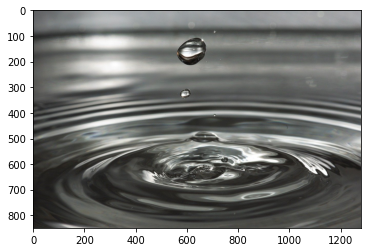

In [15]:
plt.imshow(img[:,:,::-1])
plt.show()

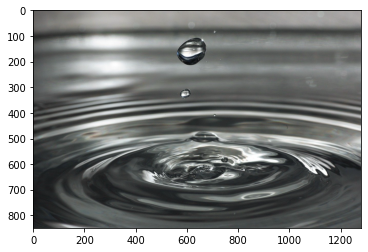

In [16]:
plt.imshow(img)
plt.show()

In [17]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [20]:
height, width = img.shape

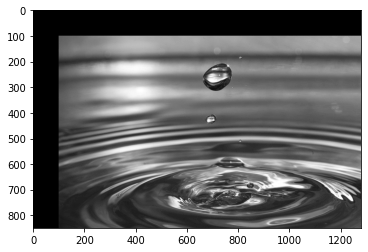

In [22]:
#tranlation
tx = 100
ty = 100
M = np.float32([[1,0,tx], [0,1,ty]])
dst = cv2.warpAffine(img, M, (width, height))
plt.imshow(dst, cmap = "gray")
plt.show()

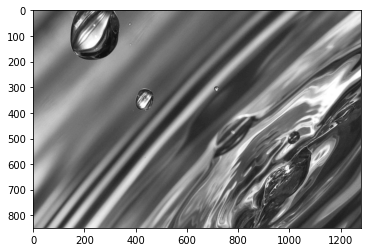

In [23]:
# Rotation
angle = 45
center = (width//2, height/2)
scale = 2
M = cv2.getRotationMatrix2D(center, angle, scale)
dst = cv2.warpAffine(img, M, (width, height))
plt.imshow(dst, cmap = "gray")
plt.show()

In [24]:
# Double the size
print(f"Ancho de imagen = {width}, height of image = {height}")

Ancho de imagen = 1280, height of image = 849


In [25]:
dst = cv2.resize(img, None, fx = 2, fy = 2, interpolation = cv2.INTER_LINEAR)

In [26]:
height, width = dst.shape

In [27]:
print(width, height)

2560 1698


### Perspective Transformation

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
img = cv2.imread("../img/book.jpg")

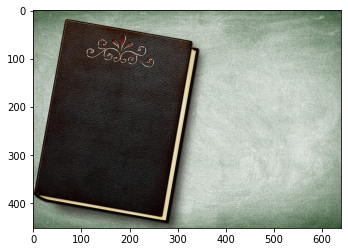

In [30]:
plt.imshow(img[:,:,::-1])
plt.show()

In [31]:
inputsPts = np.float32([[4, 381], [266, 429], [329, 68], [68, 20]])
outPts = np.float32([[0, 300], [300, 300], [300, 0], [0,0]])

In [34]:
M = cv2.getPerspectiveTransform(inputsPts, outPts)

In [35]:
dst = cv2.warpPerspective(img, M, (300,300))

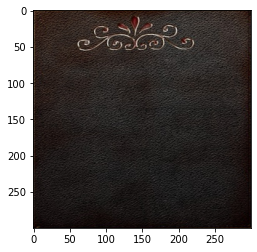

In [36]:
plt.imshow(dst[:,:,::-1])
plt.show()

# Image Arithmetics

In [37]:
img = cv2.imread("../img/puppy.jpg")

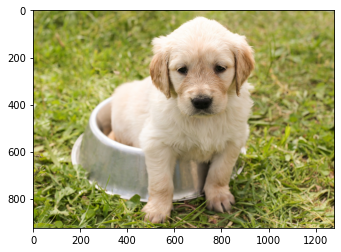

In [38]:
plt.imshow(img[:,:,::-1])
plt.show()

In [39]:
numpyImg = img + 100

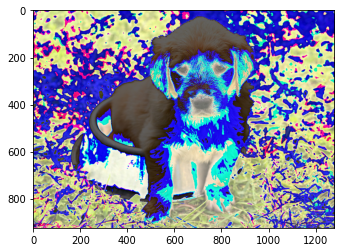

In [41]:
plt.imshow(numpyImg[:,:,::-1])
plt.show()

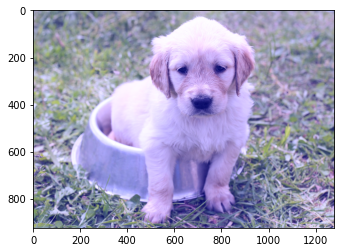

In [42]:
opencvImg = cv2.add(img, 100)
plt.imshow(opencvImg[:,:,::-1])
plt.show()

In [43]:
img.shape

(924, 1280, 3)

In [47]:
nparr = np.ones((924, 1280, 3), dtype = np.uint8) * 100
print(nparr.shape)
print(nparr)

(924, 1280, 3)
[[[100 100 100]
  [100 100 100]
  [100 100 100]
  ...
  [100 100 100]
  [100 100 100]
  [100 100 100]]

 [[100 100 100]
  [100 100 100]
  [100 100 100]
  ...
  [100 100 100]
  [100 100 100]
  [100 100 100]]

 [[100 100 100]
  [100 100 100]
  [100 100 100]
  ...
  [100 100 100]
  [100 100 100]
  [100 100 100]]

 ...

 [[100 100 100]
  [100 100 100]
  [100 100 100]
  ...
  [100 100 100]
  [100 100 100]
  [100 100 100]]

 [[100 100 100]
  [100 100 100]
  [100 100 100]
  ...
  [100 100 100]
  [100 100 100]
  [100 100 100]]

 [[100 100 100]
  [100 100 100]
  [100 100 100]
  ...
  [100 100 100]
  [100 100 100]
  [100 100 100]]]


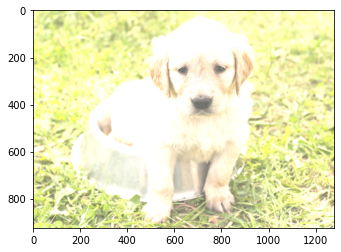

In [45]:
opencvImg = cv2.add(img, nparr)
plt.imshow(opencvImg[:,:,::-1])
plt.show()

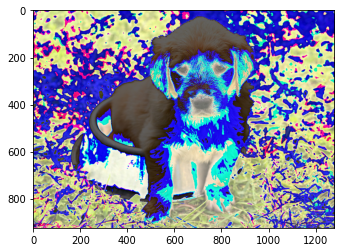

In [48]:
npImg = img + nparr
plt.imshow(npImg[:,:,::-1])
plt.show()

### con Multiply

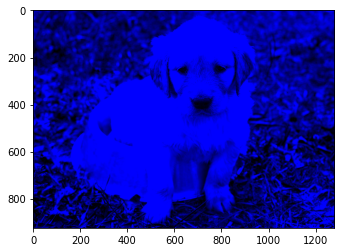

In [49]:
cvImg = cv2.multiply(img, 2)
plt.imshow(cvImg[:,:,::-1])
plt.show()

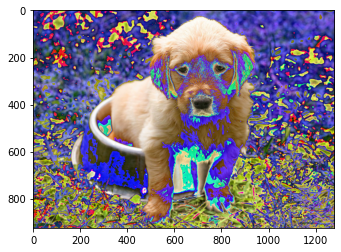

In [50]:
npImg = img * 2
plt.imshow(npImg[:,:,::-1])
plt.show()

In [51]:
nparr = np.ones((924, 1280, 3), dtype = np.uint8)*2

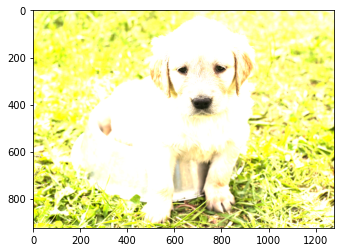

In [52]:
cvImg = cv2.multiply(img, nparr)
plt.imshow(cvImg[:,:,::-1])
plt.show()

### Binary images

In [53]:
thresh = 125
maxValue = 255
th, dst = cv2.threshold(img, thresh, maxValue, cv2.THRESH_BINARY)

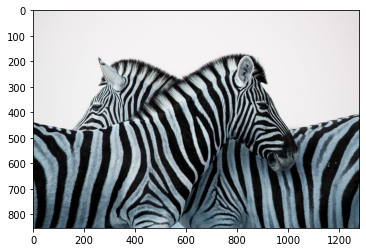

In [54]:
img = cv2.imread("../img/zebra.jpg")
plt.imshow(img)
plt.show()

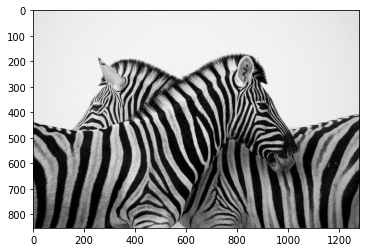

In [55]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = "gray")
plt.show()

In [58]:
thresh = 200
maxValue = 255
th, dst = cv2.threshold(img, thresh, maxValue, cv2.THRESH_BINARY)

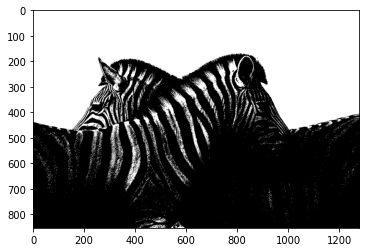

In [59]:
plt.imshow(dst, cmap="gray")
plt.show()

In [60]:
img1 = cv2.imread("../img/board.png")
img2 = cv2.imread("../img/board2.png")


In [62]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

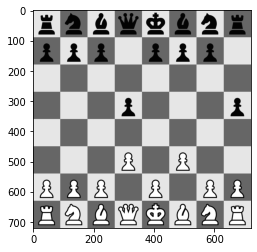

In [63]:
plt.imshow(img1, cmap = "gray")
plt.show()

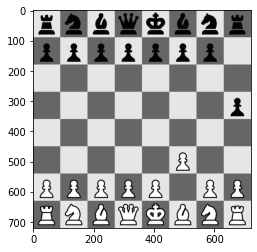

In [64]:
plt.imshow(img2, cmap = "gray")
plt.show()

In [65]:
thresh = 150
maxValue = 255
th, dst1 = cv2.threshold(img1, thresh, maxValue, cv2.THRESH_BINARY)

In [66]:
th, dst2 = cv2.threshold(img2, thresh, maxValue, cv2.THRESH_BINARY)

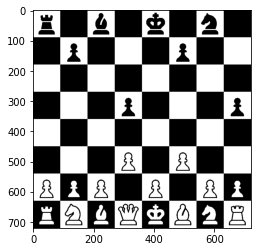

In [67]:
plt.imshow(dst1, cmap = "gray")
plt.show()

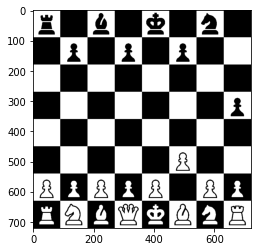

In [68]:
plt.imshow(dst2, cmap = "gray")
plt.show()

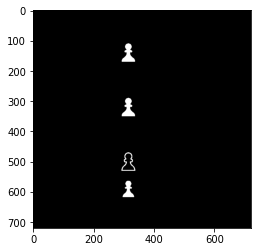

In [69]:
dst = cv2.bitwise_xor(dst1, dst2)
plt.imshow(dst, cmap = "gray")
plt.show()

### Masking

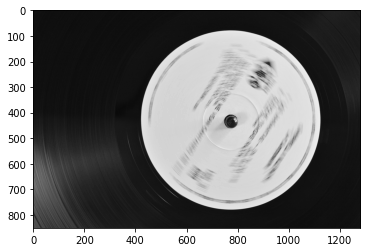

In [70]:
img = cv2.imread("../img/recording.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = "gray")
plt.show()

In [88]:
thresh = 150
maxValue = 255
th, dst = cv2.threshold(img, thresh, maxValue, cv2.THRESH_BINARY)

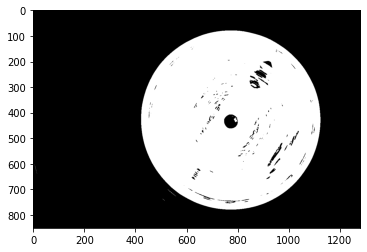

In [89]:
plt.imshow(dst, cmap="gray")
plt.show()

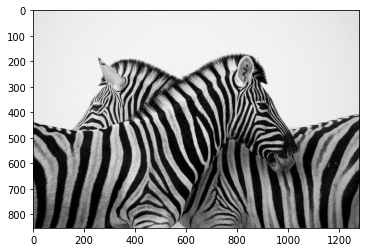

In [90]:
img2 = cv2.imread("../img/zebra.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap = "gray")
plt.show()

In [91]:
print(img.shape)
print(img2.shape)

(851, 1280)
(853, 1280)


In [92]:
dim = (img.shape[1], img.shape[0])
print(dim)

(1280, 851)


In [93]:
img2_ = cv2.resize(img2, dim, interpolation = cv2.INTER_LINEAR)

In [94]:
img2_.shape

(851, 1280)

In [95]:
result = np.where(dst, img2_, 0)

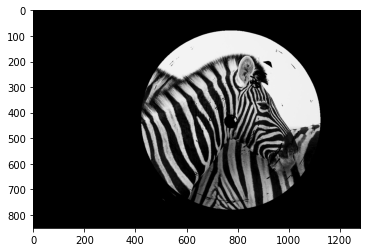

In [99]:
plt.imshow(result, cmap="gray")
plt.show()